First Project - Exploratory Data Analysis

Jimmy Jaya Nugraha


### Objective
Increase sales in store C especially in fashion and accessories


### 1. Import Library dan Load Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import plotly.express as px
from statsmodels.stats import multicomp

In [2]:
# Data Loading
df= pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### 2. Data Preprocessing

#### 2.1 Pengecekan Data

In [3]:
# Cek info dari setiap kolom, melihat dtype dan non null count nya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
# Melihat jumlah expected missing value
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
# Melihat describenya
df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


Pengecekan dari describe , isnull, dan info untuk setiap kolom:
- Invoice ID : jumlah data 1000, dan tidak ada yang sama karena uniquenya 1000 juga, tidak ada yang null, tanpa expected missing value
- Branch : sesuai ada 3 branch, dengan 3 unique values, tanpa expected missing value
- City : berjumlah 3 unique values, tanpa expected missing values
- Customer type : Sesuai ada 2 unique values karen aharusnya isinya member dan normal, tanpa expected missing values
- Gender : Sesuai terdapat 2 jenis gender, tanpa expected missing values
- Unit Price : Sesuai karena jenis datanya float, sekilas terlihat dari mean dan median data terlihat normal, tanpa expected missing values
- Quantity : Sesuai karena tipenya integer, sekilas terlihat dari mean dan median data terlihat normal, tanpa expected missing values
- Tax 5% : Sesuai karena tipenya float, sekilas terlihat dari mean dan median data terlihat TIDAK NORMAL, tanpa expected missing values
- Total : Sesuai karena tipenya float, sekilas terlihat dari mean dan median data terlihat TIDAK NORMAL, tanpa expected missing values
- Date : tipenya object, tanpa expected missing values
- Time : tipenya object, tanpa expected missing values
- Payment : Sesuai ada 3 jenis pembayaran, karena ada 3 unique values, tanpa expected missing values
- cogs : Sesuai karena tipenya float, sekilas terlihat dari mean dan median data terlihat TIDAK NORMAL, tanpa expected missing values, nilainya juga lebih kecil daripada total
- gross margin percentage : Sesuai karena tipenya float, sekilas terlihat dari mean dan median data terlihat normal, tanpa expected missing values
- gross income : Sesuai karena tipenya float, sekilas terlihat dari mean dan median data terlihat TIDAK NORMAL, tanpa expected missing values
- Rating : tipe data float berarti customer memberikan rating hingga desimal atau mungkin yang ada di data adalah rata-rata dari beberapa penilaian. Sekilas rata-rata dan mediannta cukup kecil dan juga agak terlihat TIDAK NORMAL, tanpa expected missing values


#### 2.2 Analisa Skewness dan Kenormalan Data

In [6]:
df.skew()

C:\Users\Jimmy\AppData\Local\Temp/ipykernel_11316/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unit price                 0.007077
Quantity                   0.012941
Tax 5%                     0.892570
Total                      0.892570
cogs                       0.892570
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
dtype: float64

Terlihat datanya banyak yang cukup right skewed, khususnya pada kolom Tax 5%, Total, cogs, dan gross income

In [7]:
# Melihat data teratas jika diurutkan dari kolom Total
df.sort_values(by='Total', ascending=True).head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2/7/2019,14:15,Cash,10.17,4.761905,0.5085,5.9
629,308-39-1707,A,Yangon,Normal,Female,Fashion accessories,12.09,1,0.6045,12.6945,1/26/2019,18:19,Credit card,12.09,4.761905,0.6045,8.2
223,279-62-1445,C,Naypyitaw,Member,Female,Fashion accessories,12.54,1,0.6270,13.1670,2/21/2019,12:38,Cash,12.54,4.761905,0.6270,8.2
443,192-98-7397,C,Naypyitaw,Normal,Male,Fashion accessories,12.78,1,0.6390,13.4190,1/8/2019,14:11,Ewallet,12.78,4.761905,0.6390,9.5
402,236-86-3015,C,Naypyitaw,Member,Male,Home and lifestyle,13.98,1,0.6990,14.6790,2/4/2019,13:38,Ewallet,13.98,4.761905,0.6990,9.8


In [8]:
# Melihat data terbawah jika diurutkan dari kolom Total
df.sort_values(by='Total', ascending=True).tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,3/2/2019,17:16,Ewallet,973.8,4.761905,48.69,4.4
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.75,1023.75,1/12/2019,16:18,Ewallet,975.0,4.761905,48.75,8.0
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.26,1034.46,1/30/2019,20:23,Ewallet,985.2,4.761905,49.26,4.5
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.49,1039.29,2/8/2019,16:20,Credit card,989.8,4.761905,49.49,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.0,4.761905,49.65,6.6


In [9]:
# Membuat kolom cogs_per_unit
df['cogs_per_unit'] = df['cogs'] / df['Quantity']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,cogs_per_unit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,74.69
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,15.28
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,46.33
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,58.22
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,86.31


In [10]:
# Melihat grafik dari data untuk cek apakah distribusi dari total, cogs, gross income tidak normal
def show_plot(data):
    fig, axes= plt.subplots(nrows=3, ncols=2, figsize=(10,12))
    fig.suptitle("Grafik Sebaran Data", fontsize=30)

    sns.histplot(data['Unit price'],ax = axes[0,0], kde=True).set_title('Grafik per satuan Unit', fontsize=12)
    sns.histplot(data['Total'],ax = axes[0,1], kde=True).set_title('Grafik per satuan Unit*Harga atau turunannya', fontsize=12)
    sns.histplot(data['Quantity'],ax = axes[1,0], bins=10, kde=True)
    sns.histplot(data['cogs'],ax = axes[1,1], kde=True)
    sns.histplot(data['cogs_per_unit'],ax = axes[2,0], kde=True)
    sns.histplot(data['gross income'],ax = axes[2,1], kde=True)

    plt.show()

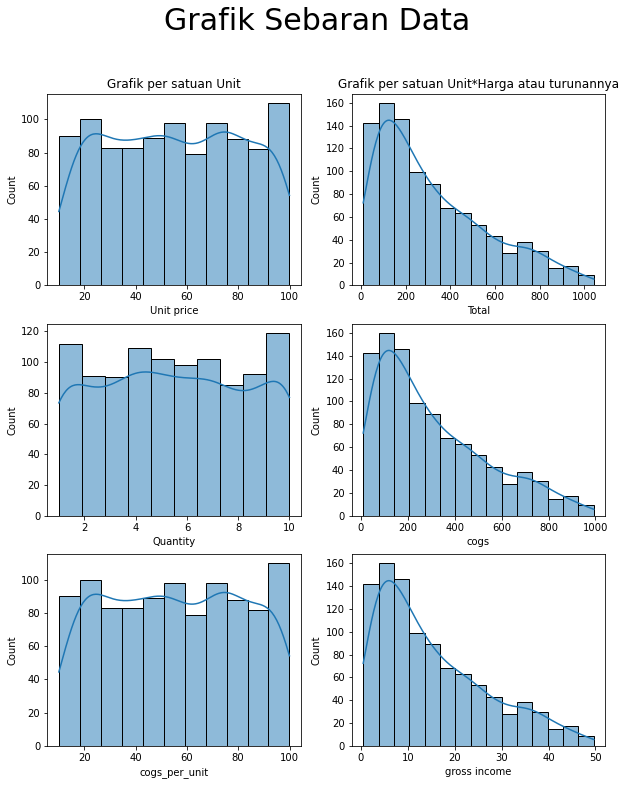

In [11]:
show_plot(df)

Terlihat tidak ada masalah ketidaknormal data tersebut, karena memang data total, cogs, gross income tersebut sangatlah wajar.<br>
Nilai-nilai tersebut merupakan perkalian antara jumlah dan unit price serta produk turunannya sehingga dengan normalnya data unit price dan quantity, nilainya otomatis akan amplifies di tingkat harga yang tinggi.

#### 2.3 Pembuatan 4 Query Data Berdasarkan Unit Price

In [12]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,cogs_per_unit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,74.69


In [13]:
# Pembuatan query data berdasarkan kelompok harga per unit
murah = df[df['Unit price'] < df['Unit price'].quantile(0.25)]
menengah_bawah = df[((df['Unit price'] < df['Unit price'].quantile(0.5)) & (df['Unit price'] >= df['Unit price'].quantile(0.25)))]
menengah_atas = df[((df['Unit price'] < df['Unit price'].quantile(0.75)) & (df['Unit price'] >= df['Unit price'].quantile(0.5)))]
mahal = df[df['Unit price'] >= df['Unit price'].quantile(0.75)] 

In [14]:
# Memasukan kelas produk ke database df
product_class = []
for i in range(len(df)):
    if df['Unit price'][i] < df['Unit price'].quantile(0.25):
        product_class.append('Murah')
    elif df['Unit price'][i] < df['Unit price'].quantile(0.5) :
        product_class.append('Menengah Bawah')
    elif df['Unit price'][i] < df['Unit price'].quantile(0.75) :
        product_class.append('Menengah Atas')
    else:
        product_class.append('Mahal')



In [15]:
df.loc[:,'product_class'] = product_class

In [16]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,cogs_per_unit,product_class
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,74.69,Menengah Atas
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,15.28,Murah
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,46.33,Menengah Bawah
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,58.22,Menengah Atas
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,86.31,Mahal


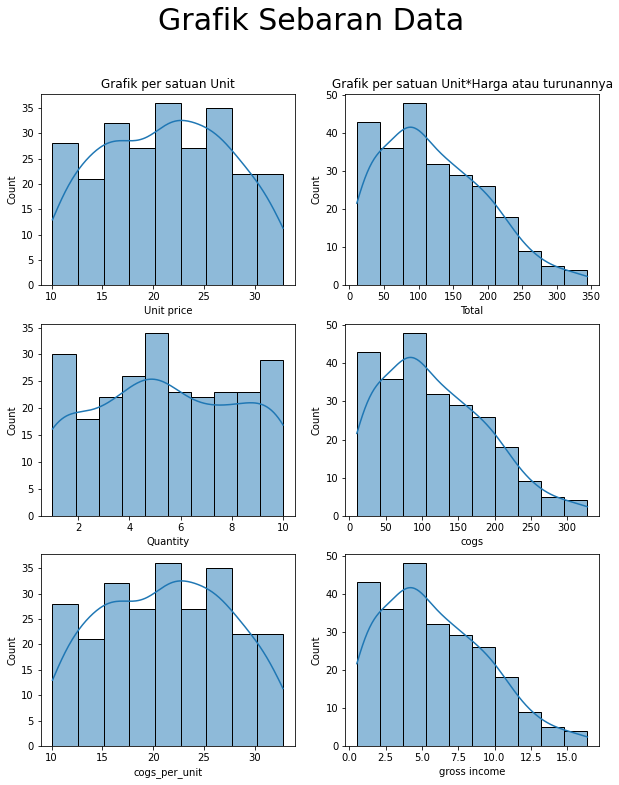

In [17]:
show_plot(murah)

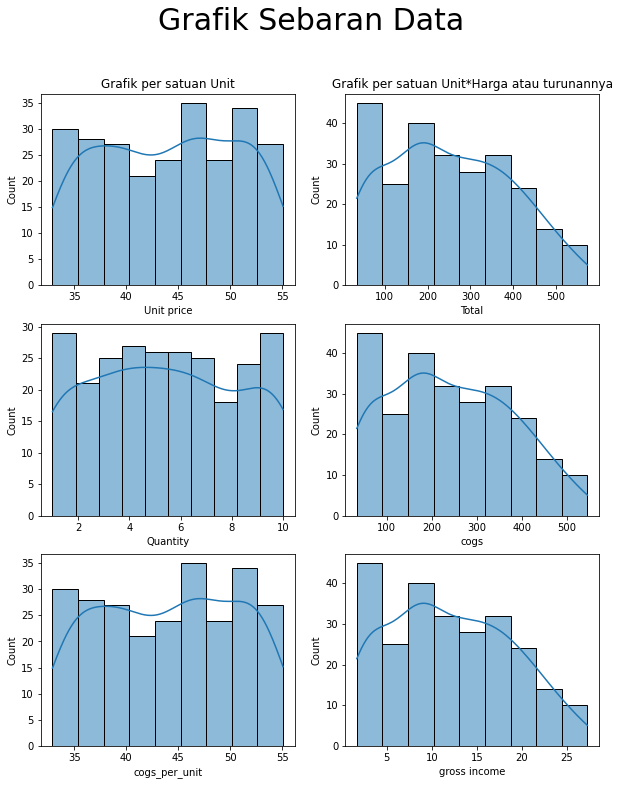

In [18]:
show_plot(menengah_bawah)

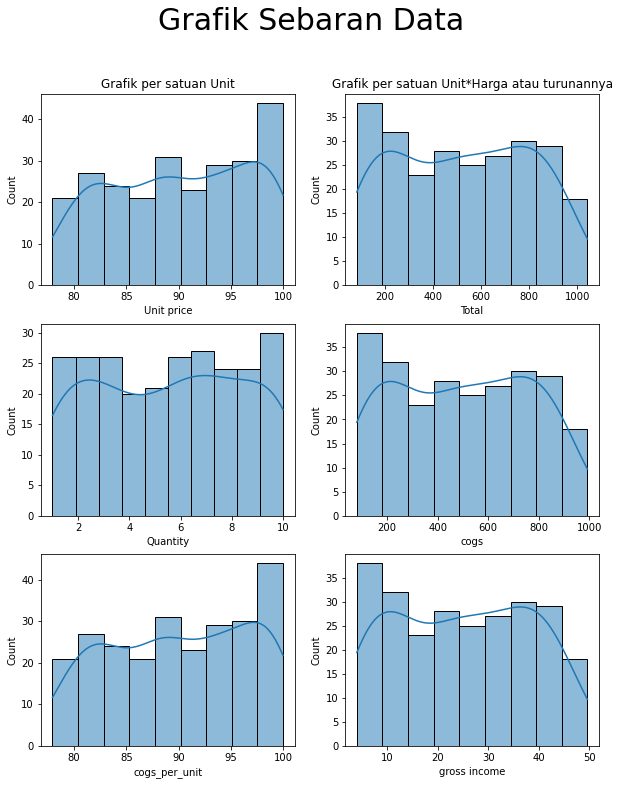

In [19]:
show_plot(mahal)

In [20]:
skew =pd.DataFrame()
skew['data_awal'] = df.select_dtypes('float').skew()
skew['murah']= murah.select_dtypes('float').skew()
skew['menengah_bawah']= menengah_bawah.select_dtypes('float').skew()
skew['menengah_atas']= menengah_atas.select_dtypes('float').skew()
skew['mahal']= mahal.select_dtypes('float').skew()
skew

,data_awal,murah,menengah_bawah,menengah_atas,mahal
Unit price,0.007077,-0.003348,-0.037489,-0.173773,-0.131314
Tax 5%,0.892570,0.603524,0.230931,0.178321,0.005923
Total,0.892570,0.603524,0.230931,0.178321,0.005923
cogs,0.892570,0.603524,0.230931,0.178321,0.005923
gross margin percentage,0.000000,0.000000,0.000000,0.000000,0.000000
gross income,0.892570,0.603524,0.230931,0.178321,0.005923
Rating,0.009010,-0.017391,-0.041039,0.113434,-0.017926
cogs_per_unit,0.007077,-0.003348,-0.037489,-0.173773,-0.131314


In [21]:
# Melihat Skewness dari data yang lebih besar dari 0.5 atau lebih kecil dari -0.5
skew[(skew>0.5)|(skew<-0.5)]

,data_awal,murah,menengah_bawah,menengah_atas,mahal
Unit price,NaN,NaN,NaN,NaN,NaN
Tax 5%,0.89257,0.603524,NaN,NaN,NaN
Total,0.89257,0.603524,NaN,NaN,NaN
cogs,0.89257,0.603524,NaN,NaN,NaN
gross margin percentage,NaN,NaN,NaN,NaN,NaN
gross income,0.89257,0.603524,NaN,NaN,NaN
Rating,NaN,NaN,NaN,NaN,NaN
cogs_per_unit,NaN,NaN,NaN,NaN,NaN


Terlihat setelah dikelompokkan menjadi 4 kelompok, data penjualan tersebut menjadi jauh lebih normal distribusinya. Adapun data yang masih agak sedikit right skewed itu data produk harga murah, datanya sedikit skew di kolom Tax 5%, total, cogs, dan gross income. Akan tetapi data tersebut semuanya merupakan derivatif dari perkalian unit price dan quantity. Sedangkan, dari unit dan quantity sama sekali tidak skewed. Maka data tersebut dapat dianggap normal persebarannya.


In [22]:
# Membuat fungsi outlayer mean
def outlayer_mean(data, kolom):
    mean = data[kolom].mean()
    std = data[kolom].std()
    outlayer1 = data[(data[kolom] < (mean - 3 * std)) | (data[kolom] > (mean + 3 * std))]
    return outlayer1

def jumlah_outlayer_mean(data, kolom):
    jumlah = outlayer_mean(data, kolom).shape[0]
    return jumlah

In [23]:
# Membuat fungsi outlayer iqr
def outlayer_iqr (data, kolom):
    q1 = data[kolom].quantile(0.25)
    q3 = data[kolom].quantile(0.75)
    iqr = q3 - q1
    outlayer2 = data[(data[kolom] < (q1 - 1.5 * iqr)) | (data[kolom] > (q3 + 1.5 * iqr))]
    return outlayer2

def jumlah_outlayer_iqr (data, kolom):
    jumlah2 = outlayer_iqr(data, kolom).shape[0]
    return jumlah2

In [24]:
# Membuat fungsi untuk melihat jumlah outlayer
def jumlah_outlayer (data):
    rekap = pd.DataFrame({'kolom':[], 'outlayer_mean':[], 'outlayer_iqr':[]})
    for i in data.select_dtypes('float').columns:
        rekap = rekap.append({'kolom':i, 'outlayer_mean':jumlah_outlayer_mean(data, i), 'outlayer_iqr':jumlah_outlayer_iqr(data, i)}, ignore_index=True)
    return rekap

In [25]:
jumlah_outlayer(df)

,kolom,outlayer_mean,outlayer_iqr
0,Unit price,0.0,0.0
1,Tax 5%,0.0,9.0
2,Total,0.0,9.0
3,cogs,0.0,9.0
4,gross margin percentage,0.0,0.0
5,gross income,0.0,9.0
6,Rating,0.0,0.0
7,cogs_per_unit,0.0,0.0


In [26]:
jumlah_outlayer(murah)

,kolom,outlayer_mean,outlayer_iqr
0,Unit price,0.0,0.0
1,Tax 5%,0.0,1.0
2,Total,0.0,1.0
3,cogs,0.0,1.0
4,gross margin percentage,0.0,0.0
5,gross income,0.0,1.0
6,Rating,0.0,0.0
7,cogs_per_unit,0.0,0.0


In [27]:
outlayer_iqr(murah, 'Tax 5%')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,cogs_per_unit
481,246-11-3901,C,Naypyitaw,Normal,Female,Electronic accessories,32.8,10,16.4,344.4,2/15/2019,12:12,Cash,328.0,4.761905,16.4,6.2,32.8


Terlihat kalau outlayer disini terlihat masih dapat digunakan karena nilainya hingga gross marginnya saja masih wajar, sehingga tidak diisolasi.

In [28]:
jumlah_outlayer(menengah_bawah)

,kolom,outlayer_mean,outlayer_iqr
0,Unit price,0.0,0.0
1,Tax 5%,0.0,0.0
2,Total,0.0,0.0
3,cogs,0.0,0.0
4,gross margin percentage,0.0,0.0
5,gross income,0.0,0.0
6,Rating,0.0,0.0
7,cogs_per_unit,0.0,0.0


In [29]:
jumlah_outlayer(menengah_atas)

,kolom,outlayer_mean,outlayer_iqr
0,Unit price,0.0,0.0
1,Tax 5%,0.0,0.0
2,Total,0.0,0.0
3,cogs,0.0,0.0
4,gross margin percentage,0.0,0.0
5,gross income,0.0,0.0
6,Rating,0.0,0.0
7,cogs_per_unit,0.0,0.0


In [30]:
jumlah_outlayer(mahal)

,kolom,outlayer_mean,outlayer_iqr
0,Unit price,0.0,0.0
1,Tax 5%,0.0,0.0
2,Total,0.0,0.0
3,cogs,0.0,0.0
4,gross margin percentage,0.0,0.0
5,gross income,0.0,0.0
6,Rating,0.0,0.0
7,cogs_per_unit,0.0,0.0


data sudah siap digunakan

### 3. Eksplorasi Data

In [31]:
# Melihat sample data
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,cogs_per_unit,product_class
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,74.69,Menengah Atas
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,15.28,Murah


In [32]:
# Melihat jumlah count per branch
# def grafik_sales (data):
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,16))

#     data.groupby('Branch').size().plot(kind='pie', ax=axes[0,0], ylabel='Branch').set_title('Sales Count each Branch')
#     data.groupby('Customer type').size().plot(kind='bar', ax=axes[1,1], ylabel='Count').set_title('Sales Count each Customer Type')
#     data.groupby('Gender').size().plot(kind='pie', ax=axes[0,1], ylabel='Gender').set_title('Sales Count each Gender')
#     data.groupby('Product line').size().plot(kind='barh', ax=axes[1,0], xlabel='Count').set_title('Sales Count each Product line')

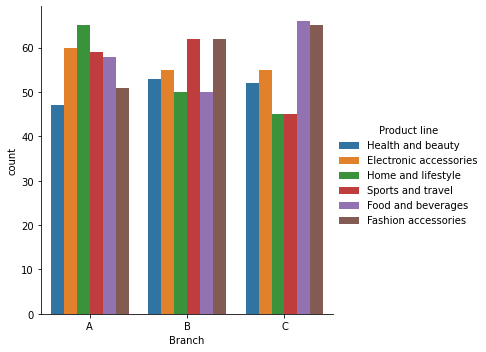

In [33]:
# Melihat perbandingan sales per Product Line di setiap cabang
sns.catplot(x='Branch',hue='Product line', data=df, kind='count', order=['A','B','C'])

Sebagai event manager di store C , terlihat store C sangat baik di penjualan Fashion accessories dan Food and beverages

<AxesSubplot:xlabel='Branch', ylabel='count'>

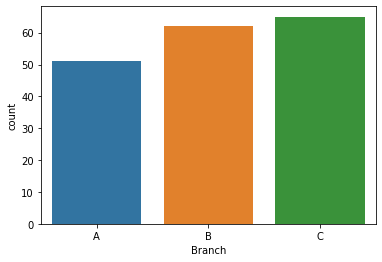

In [34]:
# Membandingkan penjualan fashion accesories di setiap cabang
sns.countplot(x='Branch', data = df[df['Product line']=='Fashion accessories'], order=['A','B','C'])

In [35]:
# pembuatan query data cabang c produk line fashion accessories
dfc= df[(df['Branch']=='C') & (df['Product line']=='Fashion accessories')]

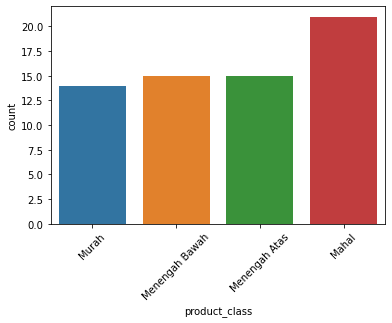

In [36]:
# Melihat jumlah penjualan di setiap kelas harga produk fashion di branch C
sns.countplot(data = dfc, x= 'product_class', order= [ 'Murah', 'Menengah Bawah', 'Menengah Atas', 'Mahal'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Store C sangat baik dalam menjual produk fashion yang mahal secara jumlah transaksi

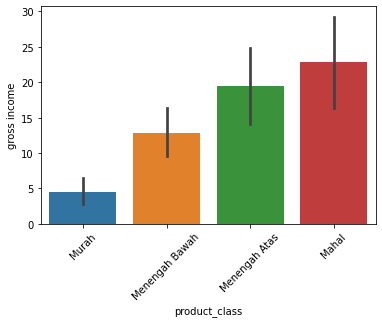

In [37]:
sns.barplot(data = dfc, x= 'product_class', order= [ 'Murah', 'Menengah Bawah', 'Menengah Atas', 'Mahal'], y = 'gross income')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

secara jumlah gross income produk mahal juga memiliki gross income yang paling besar di store c

<Figure size 432x288 with 0 Axes>

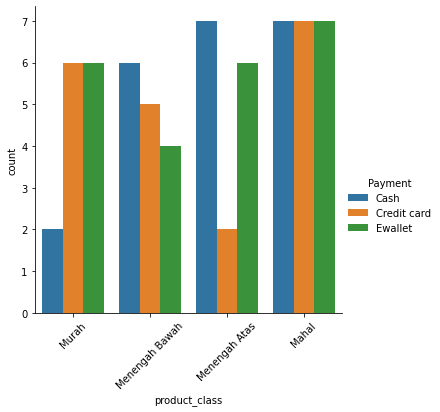

In [38]:
# Melihat perbandingan jenis pembayaran di setiap kelas harga produk
fig = plt.figure()

sns.catplot(data=dfc, x='product_class',order=['Murah','Menengah Bawah', 'Menengah Atas','Mahal'], hue='Payment', hue_order=['Cash','Credit card', 'Ewallet'],  kind='count')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Terlihat kalau 
- produk murah lebih banyak yang bayar secara credit card dan ewallet
- produk menengah bawah lebih banyak menggunakan cash
- produk menengah atas lebih banyak menggunakan cash
- produk mahal sama banyak antara cash, credit card dan ewallet

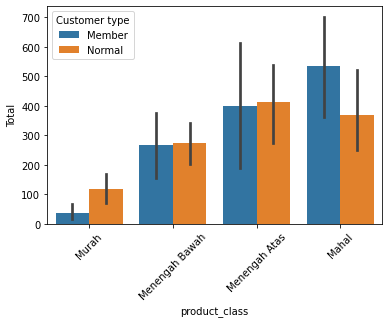

In [39]:
# Melihat perbandingan Total spending setiap customer type di setiap kelas harga produk
sns.barplot(data=dfc, x='product_class',order=['Murah','Menengah Bawah', 'Menengah Atas','Mahal'],y='Total', hue='Customer type')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Terlihat member sangat tertarik dengan produk mahal

<AxesSubplot:ylabel='None'>

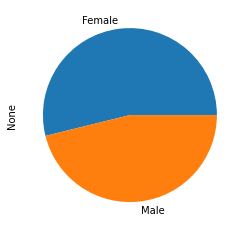

In [40]:
# Melihat perbandingan gender secara keseluruhan di dfc
dfc.groupby('Gender').size().plot(kind='pie')

Terlihat kalau secara umum, pembeli wanita yang lebih banyak membeli produk fashion di store C

<AxesSubplot:ylabel='Total'>

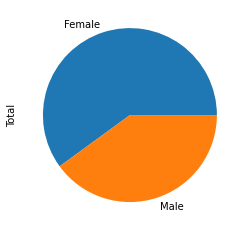

In [41]:
dfc[dfc['Customer type']=='Member'].groupby('Gender').sum()['Total'].plot(kind='pie')

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

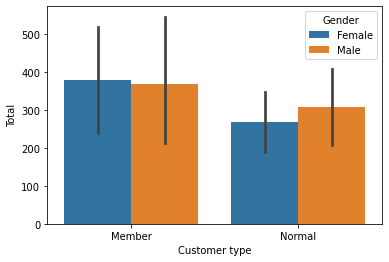

In [42]:
# Melihat perbandingan Total pada setiap Gender di setiap customer type
sns.barplot(data=dfc, x='Customer type', hue='Gender', y= 'Total')


Member wanita sama dominan dengan pria

<AxesSubplot:xlabel='Unit price', ylabel='Quantity'>

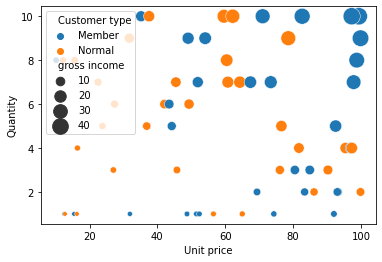

In [43]:
# melihat Gross income di setiap harga dan qty dengan scatter plot
sns.scatterplot(x='Unit price', y='Quantity',hue='Customer type',  size= 'gross income', sizes=(20,300), data=dfc)

Terlihat untuk meningkatkan profit sebaiknya memaksimalkan penjualan dari produk mahal dan juga meningkatkan kuantitasnya. Berdasarkan data, produk murah juga tidak menang dari segi kuantitas, sehingga bisa dikesampingkan. Member juga mendominasi di kanan atas grafik yang berrati memberikan gross income yang tinggi.

### 4. Hypothesis Testing

#### 4.1 Anova untuk mengecek apakah gross income produk fashion kelas mahal paling banyak diantara kelas lainnya di store C

$$ H0: \mu A  =  \mu B  = \mu C $$
$$ H1: \mu A  \neq  \mu B  \neq \mu C $$

In [44]:
# Test anova one way
gi_murah = dfc[dfc['product_class']=='Murah']['gross income']
gi_menengah_bawah = dfc[dfc['product_class']=='Menengah Bawah']['gross income']
gi_menengah_atas = dfc[dfc['product_class']=='Menengah Atas']['gross income']
gi_mahal = dfc[dfc['product_class']=='Mahal']['gross income']

f_stat,p_value = stats.f_oneway(gi_murah,gi_menengah_bawah,gi_menengah_atas,gi_mahal)
print('P-value:',p_value)


P-value: 4.5940388565548746e-05


In [45]:
for_tukey = dfc[['product_class','gross income']]
for_tukey.head()

,product_class,gross income
49,Mahal,41.3150
53,Murah,0.7715
71,Menengah Atas,31.0600
76,Menengah Bawah,22.0680
86,Menengah Atas,19.1300


In [46]:
tukey = multicomp.pairwise_tukeyhsd(endog=for_tukey['gross income'], groups=for_tukey['product_class'], alpha=0.05)
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
         Mahal  Menengah Atas  -3.3697 0.7659 -12.9695  6.2301  False
         Mahal Menengah Bawah -10.0261 0.0374 -19.6259 -0.4263   True
         Mahal          Murah -18.3071  0.001 -28.1048 -8.5093   True
 Menengah Atas Menengah Bawah  -6.6564  0.335 -17.0254  3.7125  False
 Menengah Atas          Murah -14.9374 0.0023 -25.4899 -4.3849   True
Menengah Bawah          Murah   -8.281 0.1738 -18.8335  2.2716  False
---------------------------------------------------------------------


Berdasarkan Anova, terdapat perbedaan signifikan antara kelas produk fashion dengan gross incomenya pada sore C.
Berdasarkan hasil Tukey terdapat subset sebagai berikut (p<0.05):
- Mahal : a
- Menengah atas : ab
- Menengah bawah : bc
- Murah: c

In [47]:
for_grafik= for_tukey.groupby('product_class').mean().reset_index()
for_grafik

,product_class,gross income
0,Mahal,22.829333
1,Menengah Atas,19.459633
2,Menengah Bawah,12.803200
3,Murah,4.522250


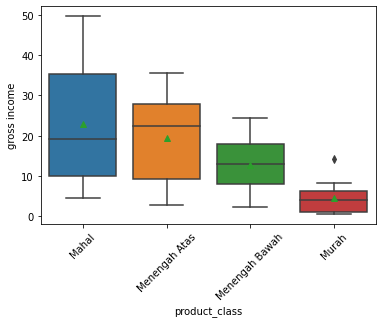

In [48]:
sns.boxplot(x='product_class',order=['Mahal', 'Menengah Atas', 'Menengah Bawah', 'Murah'],y='gross income', data=dfc,showmeans=True)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

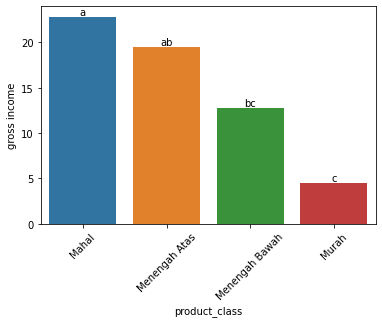

In [49]:
# memvisualisasikan mean setiap kelas produk dan juga menunjukan perbedaan subset di confidence level 95%
ax =sns.barplot(x='product_class', y='gross income', data=for_grafik)
ax.bar_label(ax.containers[0], labels=['a','ab','bc','c'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Terlihat produk mahal dan menengah atas menghasilkan gross income yang sama dan merupakan produk yang menghasilkan gross income terbesar pada store C line fashion accesories.

#### 4.2 - Anova untuk Melihat apakah benar member lebih mau spending lebih banyak di produk yang mahal

In [50]:
tm_murah = dfc[((dfc['product_class']=='Murah' )&(df['Customer type']=='Member'))]['Total']
tm_menengah_bawah = dfc[((dfc['product_class']=='Menengah Bawah' )&(df['Customer type']=='Member'))]['Total']
tm_menengah_atas = dfc[((dfc['product_class']=='Menengah Atas' )&(df['Customer type']=='Member'))]['Total']
tm_mahal = dfc[((dfc['product_class']=='Mahal' )&(df['Customer type']=='Member'))]['Total']


f_stat,p_value = stats.f_oneway(tm_murah,tm_menengah_bawah,tm_menengah_atas,tm_mahal)
print('P-value:',p_value)

P-value: 0.018092403069278326


C:\Users\Jimmy\AppData\Local\Temp/ipykernel_11316/4019923953.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tm_murah = dfc[((dfc['product_class']=='Murah' )&(df['Customer type']=='Member'))]['Total']
C:\Users\Jimmy\AppData\Local\Temp/ipykernel_11316/4019923953.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tm_menengah_bawah = dfc[((dfc['product_class']=='Menengah Bawah' )&(df['Customer type']=='Member'))]['Total']
C:\Users\Jimmy\AppData\Local\Temp/ipykernel_11316/4019923953.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tm_menengah_atas = dfc[((dfc['product_class']=='Menengah Atas' )&(df['Customer type']=='Member'))]['Total']
C:\Users\Jimmy\AppData\Local\Temp/ipykernel_11316/4019923953.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tm_mahal = dfc[((dfc['product_class']=='Mahal' )&(df['Customer type']=='Member'))]['Total']


Hasilnya signifikan maka akan dilakukan post hoc test berupa tukey HSD

In [51]:
for_tukey= dfc[dfc['Customer type']=='Member'][['product_class','Total']]
for_tukey.head()

,product_class,Total
49,Mahal,867.6150
53,Murah,16.2015
76,Menengah Bawah,463.4280
100,Menengah Bawah,51.1455
195,Menengah Atas,78.0045


In [52]:
tukey = multicomp.pairwise_tukeyhsd(endog=for_tukey['Total'], groups=for_tukey['product_class'], alpha=0.05)
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------
         Mahal  Menengah Atas -134.8723 0.7702 -532.9209 263.1762  False
         Mahal Menengah Bawah -269.8932 0.1326 -596.3209  56.5344  False
         Mahal          Murah -498.5089 0.0194  -931.671 -65.3467   True
 Menengah Atas Menengah Bawah -135.0209 0.8032 -561.1744 291.1326  False
 Menengah Atas          Murah -363.6365 0.2361 -876.1609 148.8878  False
Menengah Bawah          Murah -228.6156 0.5311 -687.7382  230.507  False
------------------------------------------------------------------------


In [53]:
for_grafik= for_tukey.groupby('product_class').mean().reset_index()
for_grafik

,product_class,Total
0,Mahal,535.602750
1,Menengah Atas,400.730400
2,Menengah Bawah,265.709500
3,Murah,37.093875


#### 4.3 - Branch B sangat baik pada penjualan Sport and travel dan sangat kurang di food and beverages


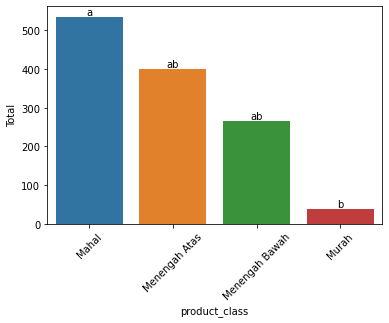

In [54]:
ax =sns.barplot(x='product_class', y='Total', data=for_grafik)
ax.bar_label(ax.containers[0], labels=['a','ab','ab','b'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

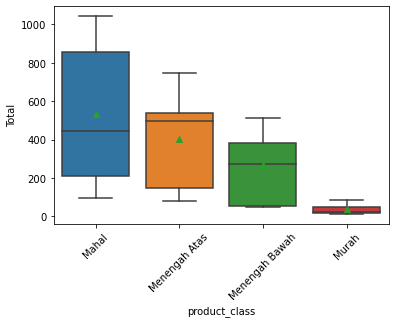

In [55]:
sns.boxplot(x='product_class',order=['Mahal', 'Menengah Atas', 'Menengah Bawah', 'Murah'],y='Total', data=dfc[dfc['Customer type']=='Member'], showmeans=True)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

#### 4.4 - Uji T test untuk melihat apakah member wanita = member laki-laki dalam total spendingnya

- H0: mu Total member wanita = mu Total member laki-laki
- H1: mu Total member wanita != mu Total member laki-laki

In [56]:
member_wanita = dfc[dfc['Gender']=='Female']
member_pria = dfc[dfc['Gender']=='Male']

In [57]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(member_wanita['Total'], member_pria['Total'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.933797480563224
t-statistics: -0.08340056162211958


C:\Users\Jimmy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jimmy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


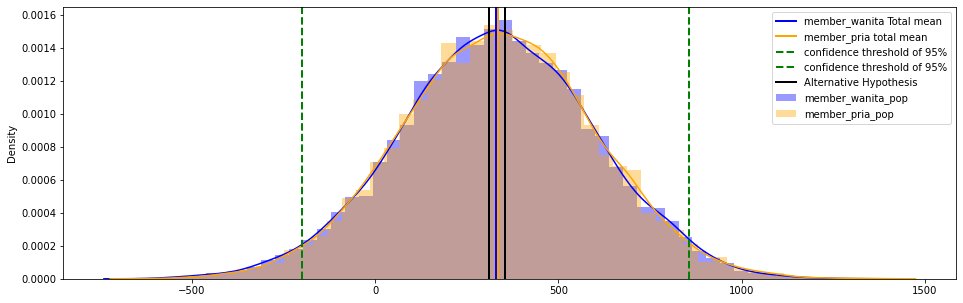

In [58]:
# simulation
member_wanita_pop = np.random.normal(member_wanita['Total'].mean(),member_wanita['Total'].std(),10000)
member_pria_pop = np.random.normal(member_pria['Total'].mean(),member_pria['Total'].std(),10000)

# confidence interval based on member wanita
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, member_wanita['Total'].mean(), member_wanita['Total'].std())

plt.figure(figsize=(16,5))
sns.distplot(member_wanita_pop, label='member_wanita_pop',color='blue')
sns.distplot(member_pria_pop, label='member_pria_pop',color='orange')

# mean
plt.axvline(member_wanita['Total'].mean(), color='blue', linewidth=2, label='member_wanita Total mean')
plt.axvline(member_pria['Total'].mean(), color='orange',  linewidth=2, label='member_pria total mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(member_wanita_pop.mean()+t_stat*member_wanita_pop.std(), color='black', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(member_wanita_pop.mean()-t_stat*member_wanita_pop.std(), color='black',  linewidth=2)

plt.legend()


Tidak terdapat member wanita dan pria memiliki total spending yang sama , terlihat dari p>0.05

In [59]:
#export database
# df.to_csv('data_customer.csv')
# dfc.to_csv('data_customer_c.csv')

## Conclusions, Assumptions, Overall Analysis
- Berdasarkan hasil analisa, untuk meningkatkan gross income dalam lini produk fashion dan accesories di cabang C, maka store C dapat berfokus pada produk kelas mahal, dan juga berfokus pada tipe pelanggan member.

- Adapun, member tidak perlu diprioritaskan dari gendernya, karena baik wanita maupun pria mempunyai total spending yang sama secara statistik.

- Produk murah sebaiknya tidak perlu diberikan promosi berlebih karena secara jumlah transaksinya juga hanya sedikit.
